# 키워드 빈도별 데이터 분석

In [1]:
import pandas as pd

df = pd.read_csv("./Keywords/브랜드별_키워드_빈도율.csv", encoding="utf-8")

In [2]:
columns = [
    'flavor_positive', 
    'flavor_negative', 
    'texture_positive', 
    'texture_negative', 
    'ingredient', 
    'diet', 
    'exercise', 
    'reorder', 
    'convenience', 
    'delivery_positive',
    'delivery_negative',
    'cost_positive',
    'volume_positive',
    'volume_negative',
    'total_positive',
    'total_negative'
]

In [278]:
files = [
    "[랭커]키워드요약_수정",
    "[러브잇]키워드요약",
    "[맛있닭]키워드_요약",
    "[아임닭]키워드요약",
    "[잇메이트]키워드_요약",
    "[잇메이트]키워드_요약",
    "[함께하닭]키워드요약",
    "[햇살닭]키워드요약"
]

In [279]:
total_df = df.copy(deep=True)

In [282]:
import math
import json

for i in range(len(df)):
    for column in columns:
        data_str = df.iloc[i][column]
        total_sum = 0
        if isinstance(data_str, float) and math.isnan(data_str):
            pass
        else:
            data_dict = eval(data_str)
            total_sum += sum(data_dict.values())
            print(data_dict, total_sum)
        total_df.iloc[i][column] = total_sum
        break
    break

{'savory': 6, 'sweet': 195, 'umami': 0, 'nice taste': 0, 'delicious': 4520, 'decent': 16, 'taste good': 31, 'tastes good': 286, 'edible': 64, 'heaven': 5, 'tasty': 143, 'good taste': 20} 5286


C:\Users\Yuna An\AppData\Local\Temp\ipykernel_14908\2892991070.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  total_df.iloc[i][column] = total_sum


In [131]:
total_df = total_df.rename(columns={"Unnamed: 0": "brand"})

In [281]:
total_df

,brand,flavor_positive,flavor_negative,texture_positive,texture_negative,ingredient,diet,exercise,reorder,convenience,delivery_positive,delivery_negative,cost_positive,volume_positive,volume_negative,total_positive,total_negative
0,랭커,5286,144,1584,60,282,653,89,2701,1582,1680,503,1320,249,149,2981,355
1,러브잇,1055,57,761,17,118,123,15,616,317,307,91,72,64,32,549,75
2,맛있닭,13414,426,3111,194,1021,2132,203,5715,3374,3120,810,621,517,426,5801,625
3,신선애,2473,76,502,97,252,612,78,1523,1257,916,315,437,162,201,1932,146
4,아임닭,467,7,84,1,10,48,1,190,96,43,28,10,15,6,158,19
5,잇메이트,13003,383,2961,92,1044,1730,188,6366,3516,3358,1075,1068,667,352,5978,667
6,한끼통살,1805,39,374,12,52,186,19,687,421,365,129,49,60,45,703,71
7,함께하닭,345,24,144,12,49,42,5,176,66,53,36,68,15,6,218,22
8,햇살닭,727,32,316,9,101,83,13,344,144,124,48,45,29,17,338,37


In [135]:
# 잘 되었는지 확인

flavor_positive = {'savory': 3.0, 'delicious': 872.0, 'tasty': 35.0, 'tastes good': 71.0, 'edible': 12.0, 'sweet': 51.0, 'taste good': 9.0, 'good taste': 2.0}
sum(flavor_positive.values())

1055.0

In [148]:
total_df.to_csv("./Keywords/total_sum.csv", encoding="utf-8", index=False)

In [153]:
df = pd.read_csv("./Keywords/total_sum.csv", encoding="utf-8")

In [158]:
new_df = df.copy(deep=True)

In [165]:
df.iloc[0][1] / 9120

C:\Users\Yuna An\AppData\Local\Temp\ipykernel_14908\947467841.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[0][1] / 9120


0.537719298245614

In [160]:
len(df.iloc[0][1])

11

In [187]:
data = df.iloc[8, 1:]

for i in range(len(data)):
    factor = data.iloc[i] / 1464
    new_df.iloc[8, i + 1] = factor

In [189]:
new_df.to_csv("./Keywords/total_keyword_factor.csv", encoding="utf-8", index=False)

In [1]:
import pandas as pd

new_df = pd.read_csv("./브랜드별_키워드_빈도율.csv", encoding="utf-8")

In [8]:
new_df = new_df.set_index("brand")

In [9]:
new_df

,총_구매_수,재구매_수,재구매율,flavor_positive,flavor_negative,texture_positive,texture_negative,ingredient,diet,exercise,reorder,convenience,delivery_positive,delivery_negative,cost_positive,volume_positive,volume_negative,total_positive,total_negative,flavor
brand,,,,,,,,,,,,,,,,,,,,
랭커,9120,1182,12.960526,0.537719,0.013487,0.172588,0.006579,0.022039,0.061732,0.008224,0.248904,0.140022,0.166228,0.037610,0.123575,0.022039,0.013596,0.246162,0.032675,0.524232
러브잇,2368,287,12.119932,0.445524,0.024071,0.321368,0.007179,0.049831,0.051943,0.006334,0.260135,0.133868,0.129645,0.038429,0.030405,0.027027,0.013514,0.231841,0.031672,0.421453
맛있닭,22922,2941,12.830469,0.585202,0.018585,0.135721,0.008463,0.044542,0.093011,0.008856,0.249324,0.147195,0.136114,0.035337,0.027092,0.022555,0.018585,0.253076,0.027266,0.566617
신선애,6583,957,14.537445,0.375665,0.011545,0.076257,0.014735,0.038280,0.092967,0.011849,0.231353,0.190946,0.139146,0.047851,0.066383,0.024609,0.030533,0.293483,0.022178,0.364120
아임닭,659,77,11.684370,0.708649,0.010622,0.127466,0.001517,0.015175,0.072838,0.001517,0.288316,0.145675,0.065250,0.042489,0.015175,0.022762,0.009105,0.239757,0.028832,0.698027
잇메이트,23536,3194,13.570700,0.552473,0.016273,0.125807,0.003909,0.044358,0.073504,0.007988,0.270479,0.149388,0.142675,0.045675,0.045377,0.028340,0.014956,0.253994,0.028340,0.536200
한끼통살,2795,393,14.060823,0.645796,0.013953,0.133810,0.004293,0.018605,0.066547,0.006798,0.245796,0.150626,0.130590,0.046154,0.017531,0.021467,0.016100,0.251521,0.025403,0.631843
함께하닭,769,117,15.214564,0.448635,0.031209,0.187256,0.015605,0.063719,0.054616,0.006502,0.228869,0.085826,0.068921,0.046814,0.088427,0.019506,0.007802,0.283485,0.028609,0.417425
햇살닭,1464,214,14.617486,0.496585,0.021858,0.215847,0.006148,0.068989,0.056694,0.008880,0.234973,0.098361,0.084699,0.032787,0.030738,0.019809,0.011612,0.230874,0.025273,0.474727


## 1. 맛(flavor) 키워드 빈도율
* flavor 빈도율 = (flavor positive) - (flavor negative)

In [3]:
from matplotlib import pyplot as plt

In [4]:
new_df["flavor"] = new_df["flavor_positive"] - new_df["flavor_negative"]

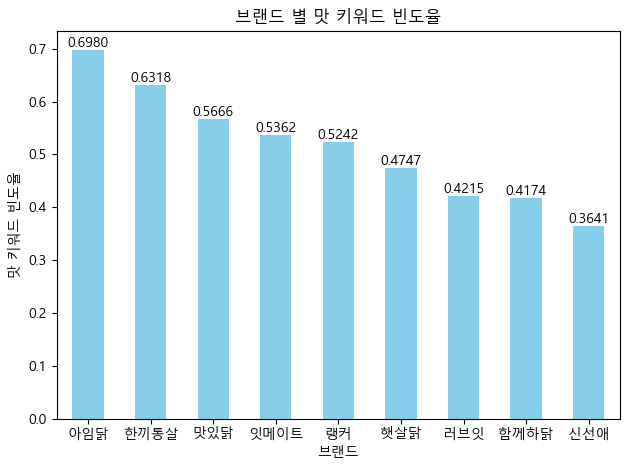

In [10]:
new_df_sorted = new_df.sort_values(by='flavor', ascending=False)

ax = new_df_sorted["flavor"].plot(kind="bar", color='skyblue')

plt.rc("font", family="Malgun Gothic")
plt.title("브랜드 별 맛 키워드 빈도율")
plt.xlabel("브랜드")
plt.ylabel("맛 키워드 빈도율")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(), 
            f'{p.get_height():.4f}', 
            ha='center', 
            va='bottom', 
            fontsize=10, 
            color='black')

plt.xticks(size=10, rotation=0, ha="center")

plt.tight_layout()

## 2. 식감(texture) 키워드 빈도율
* texture 빈도율 = (texture positive) - (texture negative)

In [11]:
new_df["texture"] = new_df["texture_positive"] - new_df["texture_negative"]

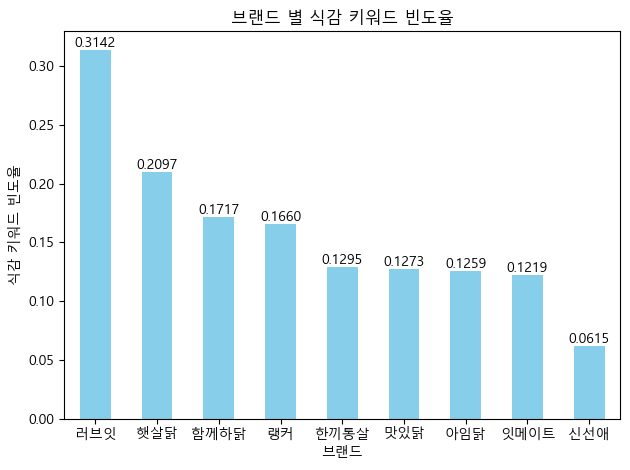

In [12]:
new_df_sorted = new_df.sort_values(by='texture', ascending=False)

ax = new_df_sorted["texture"].plot(kind="bar", color='skyblue')

plt.rc("font", family="Malgun Gothic")
plt.title("브랜드 별 식감 키워드 빈도율")
plt.xlabel("브랜드")
plt.ylabel("식감 키워드 빈도율")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(), 
            f'{p.get_height():.4f}', 
            ha='center', 
            va='bottom', 
            fontsize=10, 
            color='black')

plt.xticks(size=10, rotation=0, ha="center")

plt.tight_layout()

## 3. 배송(delivery) 키워드 빈도율
* delivery 빈도율 = (delivery positive) - (delivery negative)

In [13]:
new_df["delivery"] = new_df["delivery_positive"] - new_df["delivery_negative"]

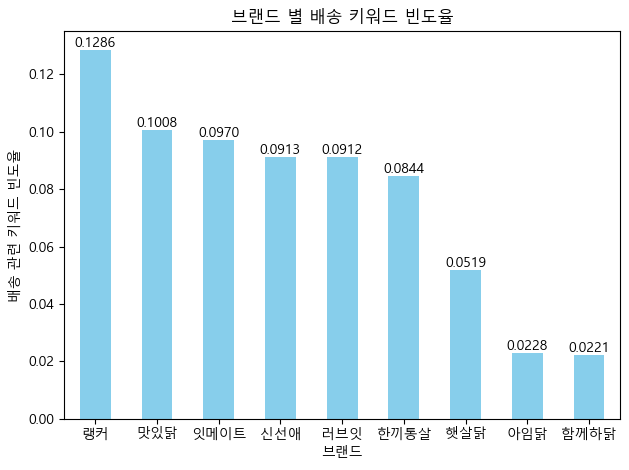

In [14]:
new_df_sorted = new_df.sort_values(by="delivery", ascending=False)

ax = new_df_sorted["delivery"].plot(kind="bar", color='skyblue')

plt.rc("font", family="Malgun Gothic")
plt.title("브랜드 별 배송 키워드 빈도율")
plt.xlabel("브랜드")
plt.ylabel("배송 관련 키워드 빈도율")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(), 
            f'{p.get_height():.4f}', 
            ha='center', 
            va='bottom', 
            fontsize=10, 
            color='black')

plt.xticks(size=10, rotation=0, ha="center")

plt.tight_layout()

## 4. 편리성(convenience) 키워드 빈도율

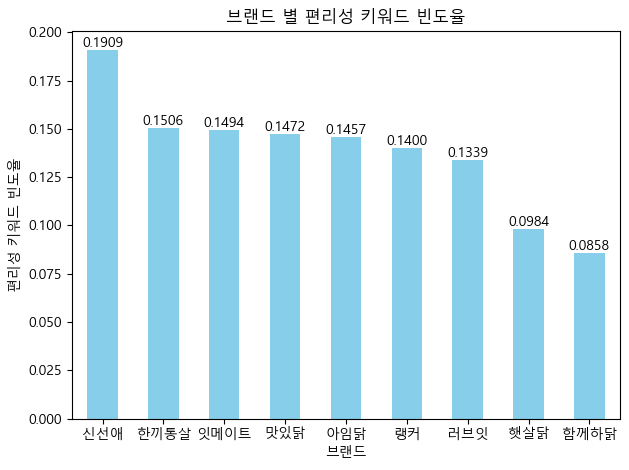

In [17]:
new_df_sorted = new_df.sort_values(by="convenience", ascending=False)

ax = new_df_sorted["convenience"].plot(kind="bar", color='skyblue')

plt.rc("font", family="Malgun Gothic")
plt.title("브랜드 별 편리성 키워드 빈도율")
plt.xlabel("브랜드")
plt.ylabel("편리성 키워드 빈도율")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(), 
            f'{p.get_height():.4f}', 
            ha='center', 
            va='bottom', 
            fontsize=10, 
            color='black')

plt.xticks(size=10, rotation=0, ha="center")

plt.tight_layout()

## 5. 다이어트(diet) 키워드 빈도율

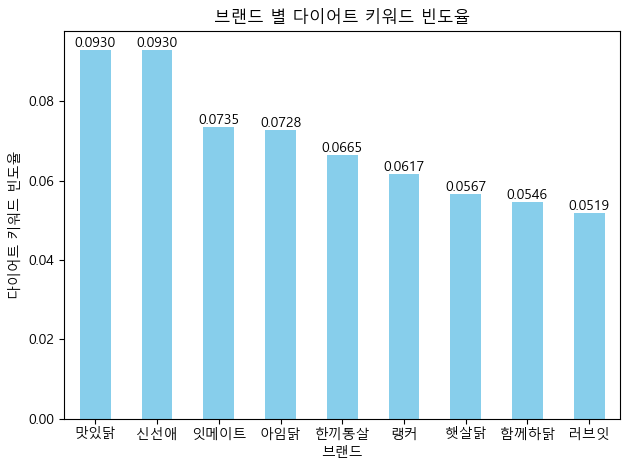

In [15]:
new_df_sorted = new_df.sort_values(by='diet', ascending=False)

ax = new_df_sorted["diet"].plot(kind="bar", color='skyblue')

plt.rc("font", family="Malgun Gothic")
plt.title("브랜드 별 다이어트 키워드 빈도율")
plt.xlabel("브랜드")
plt.ylabel("다이어트 키워드 빈도율")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(), 
            f'{p.get_height():.4f}', 
            ha='center', 
            va='bottom', 
            fontsize=10, 
            color='black')

plt.xticks(size=10, rotation=0, ha="center")

plt.tight_layout()

## 6. 운동(exercise) 키워드 빈도율

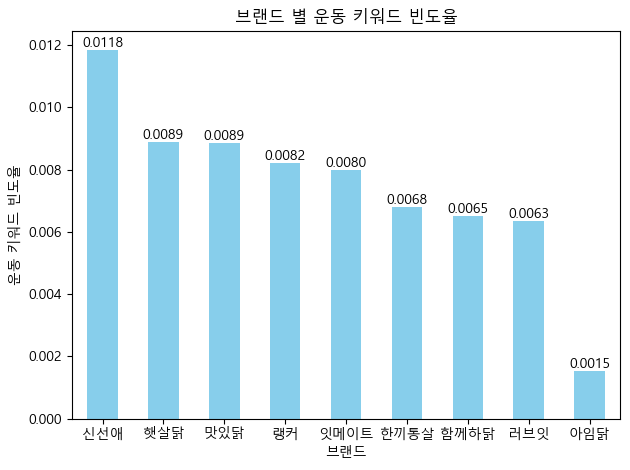

In [16]:
new_df_sorted = new_df.sort_values(by='exercise', ascending=False)

ax = new_df_sorted["exercise"].plot(kind="bar", color='skyblue')

plt.rc("font", family="Malgun Gothic")
plt.title("브랜드 별 운동 키워드 빈도율")
plt.xlabel("브랜드")
plt.ylabel("운동 키워드 빈도율")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(), 
            f'{p.get_height():.4f}', 
            ha='center', 
            va='bottom', 
            fontsize=10, 
            color='black')

plt.xticks(size=10, rotation=0, ha="center")

plt.tight_layout()

## 7. 성분(ingredient) 키워드 빈도율

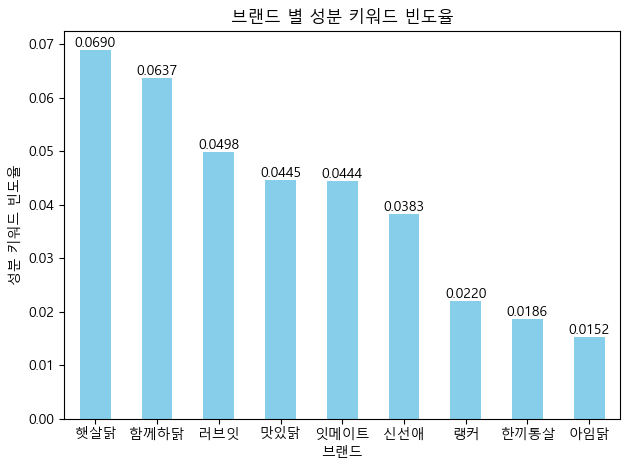

In [19]:
new_df_sorted = new_df.sort_values(by="ingredient", ascending=False)

ax = new_df_sorted["ingredient"].plot(kind="bar", color='skyblue')

plt.rc("font", family="Malgun Gothic")
plt.title("브랜드 별 성분 키워드 빈도율")
plt.xlabel("브랜드")
plt.ylabel("성분 키워드 빈도율")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(), 
            f'{p.get_height():.4f}', 
            ha='center', 
            va='bottom', 
            fontsize=10, 
            color='black')

plt.xticks(size=10, rotation=0, ha="center")

plt.tight_layout()

## 8. 재구매(reorder) 키워드 빈도율

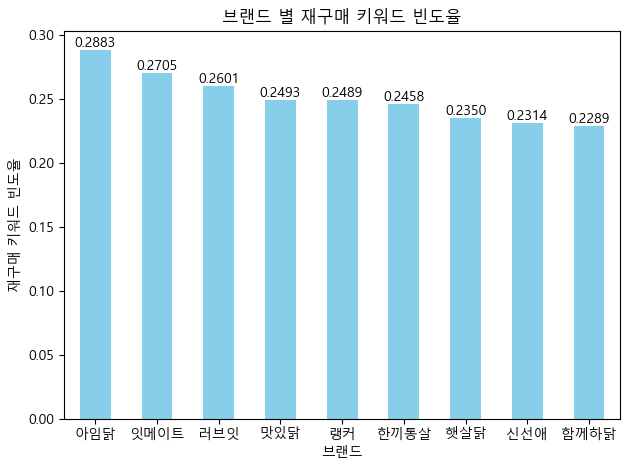

In [20]:
from matplotlib import pyplot as plt

new_df_sorted = new_df.sort_values(by='reorder', ascending=False)

ax = new_df_sorted['reorder'].plot(kind="bar", color='skyblue')

plt.rc("font", family="Malgun Gothic")
plt.title("브랜드 별 재구매 키워드 빈도율")
plt.xlabel("브랜드")
plt.ylabel("재구매 키워드 빈도율")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(), 
            f'{p.get_height():.4f}', 
            ha='center', 
            va='bottom', 
            fontsize=10, 
            color='black')

plt.xticks(size=10, rotation=0, ha="center")

plt.tight_layout()

## 9. 가성비(cost_positive) 키워드 빈도율

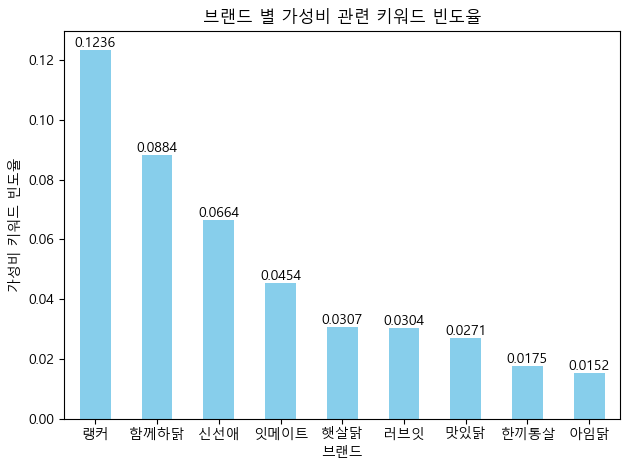

In [21]:
from matplotlib import pyplot as plt

new_df_sorted = new_df.sort_values(by='cost_positive', ascending=False)

ax = new_df_sorted['cost_positive'].plot(kind="bar", color='skyblue')

plt.rc("font", family="Malgun Gothic")
plt.title("브랜드 별 가성비 관련 키워드 빈도율")
plt.xlabel("브랜드")
plt.ylabel("가성비 키워드 빈도율")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(), 
            f'{p.get_height():.4f}', 
            ha='center', 
            va='bottom', 
            fontsize=10, 
            color='black')

plt.xticks(size=10, rotation=0, ha="center")

plt.tight_layout()

## 10. 양(volume) 키워드 빈도율
* volume 키워드 빈도율 = (volume positive) - (volume negative)

In [22]:
new_df["volume"] = new_df["volume_positive"] - new_df["volume_negative"]

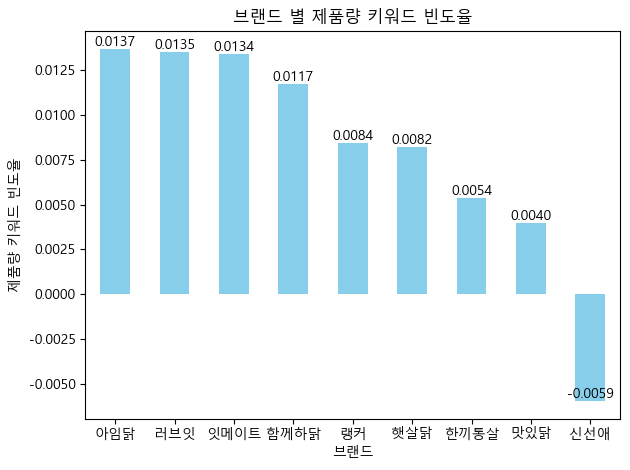

In [23]:
from matplotlib import pyplot as plt

new_df_sorted = new_df.sort_values(by="volume", ascending=False)

ax = new_df_sorted["volume"].plot(kind="bar", color='skyblue')

plt.rc("font", family="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False
plt.title("브랜드 별 제품량 키워드 빈도율")
plt.xlabel("브랜드")
plt.ylabel("제품량 키워드 빈도율")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(), 
            f'{p.get_height():.4f}', 
            ha='center', 
            va='bottom', 
            fontsize=10, 
            color='black')

plt.xticks(size=10, rotation=0, ha="center")

plt.tight_layout()

## 11. 긍정(종합) 키워드 빈도율

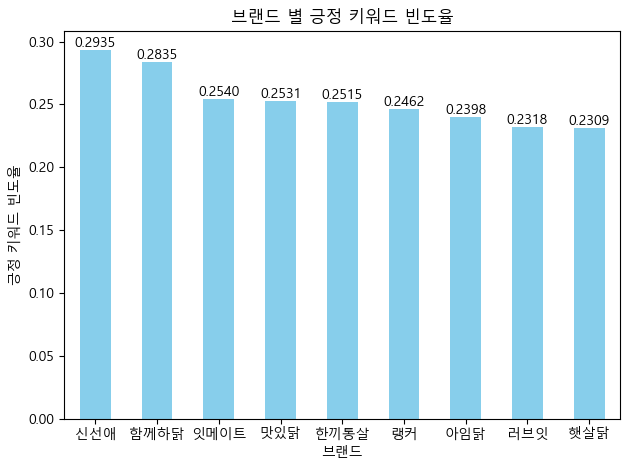

In [24]:
from matplotlib import pyplot as plt

new_df_sorted = new_df.sort_values(by="total_positive", ascending=False)

ax = new_df_sorted["total_positive"].plot(kind="bar", color='skyblue')

plt.rc("font", family="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False
plt.title("브랜드 별 긍정 키워드 빈도율")
plt.xlabel("브랜드")
plt.ylabel("긍정 키워드 빈도율")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(), 
            f'{p.get_height():.4f}', 
            ha='center', 
            va='bottom', 
            fontsize=10, 
            color='black')

plt.xticks(size=10, rotation=0, ha="center")

plt.tight_layout()

## 12. 부정(종합) 키워드 빈도율

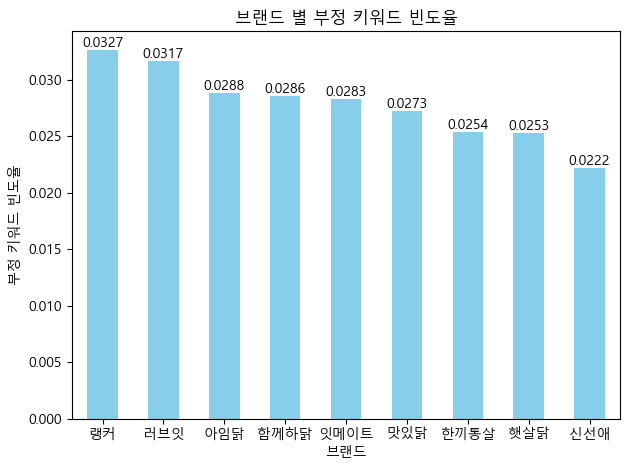

In [25]:
from matplotlib import pyplot as plt

new_df_sorted = new_df.sort_values(by="total_negative", ascending=False)

ax = new_df_sorted["total_negative"].plot(kind="bar", color='skyblue')

plt.rc("font", family="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False
plt.title("브랜드 별 부정 키워드 빈도율")
plt.xlabel("브랜드")
plt.ylabel("부정 키워드 빈도율")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(), 
            f'{p.get_height():.4f}', 
            ha='center', 
            va='bottom', 
            fontsize=10, 
            color='black')

plt.xticks(size=10, rotation=0, ha="center")

plt.tight_layout()

## 13. 종합 키워드 빈도율
* 종합 키워드 빈도 = (total positive) - (total negative)

In [26]:
new_df["total"] = new_df["total_positive"] - new_df["total_negative"]

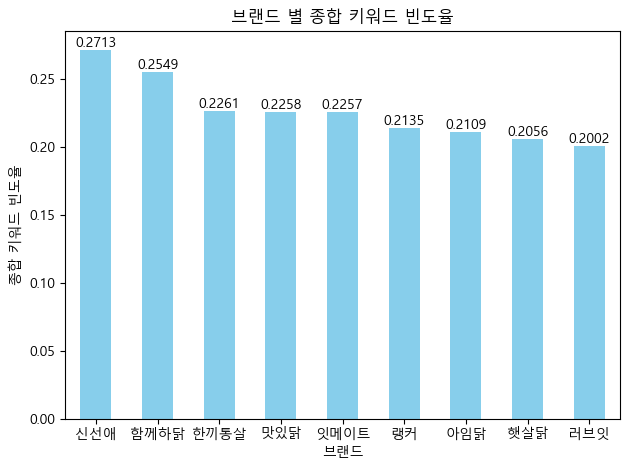

In [27]:
from matplotlib import pyplot as plt

new_df_sorted = new_df.sort_values(by="total", ascending=False)

ax = new_df_sorted["total"].plot(kind="bar", color='skyblue')

plt.rc("font", family="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False
plt.title("브랜드 별 종합 키워드 빈도율")
plt.xlabel("브랜드")
plt.ylabel("종합 키워드 빈도율")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(), 
            f'{p.get_height():.4f}', 
            ha='center', 
            va='bottom', 
            fontsize=10, 
            color='black')

plt.xticks(size=10, rotation=0, ha="center")

plt.tight_layout()